In [12]:
import pandas as pd
data = pd.read_csv('delivery_time.csv')
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Text(0, 0.5, 'Sorting_Time')

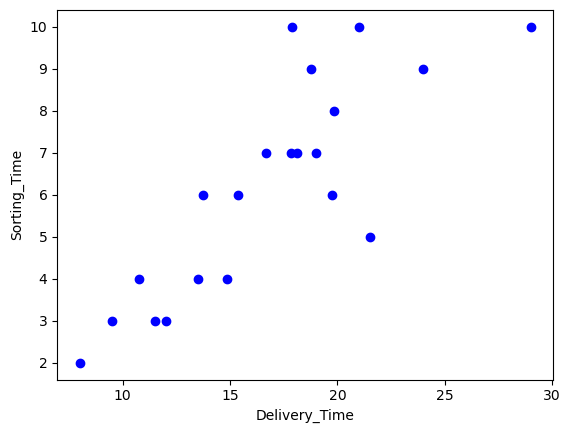

In [15]:
import matplotlib.pyplot as plt
plt.plot(data.Delivery_Time,data.Sorting_Time, "bo") 
plt.xlabel("Delivery_Time")
plt.ylabel("Sorting_Time") 

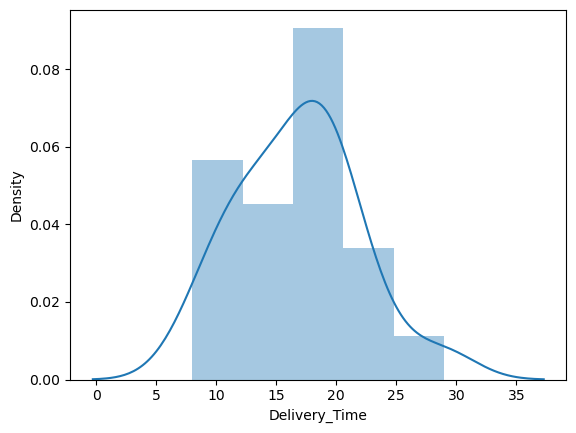

In [17]:
import seaborn as sns
sns.distplot(data['Delivery_Time'])
import warnings
warnings.filterwarnings('ignore') 

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

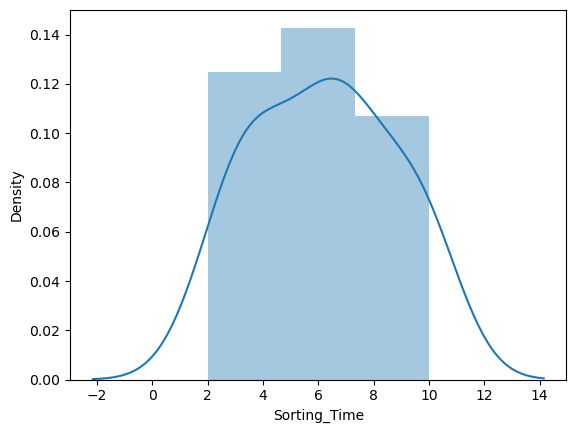

In [18]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(data['Sorting_Time']) 

In [19]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time ~ Sorting_Time", data = data).fit()

In [20]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        02:17:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

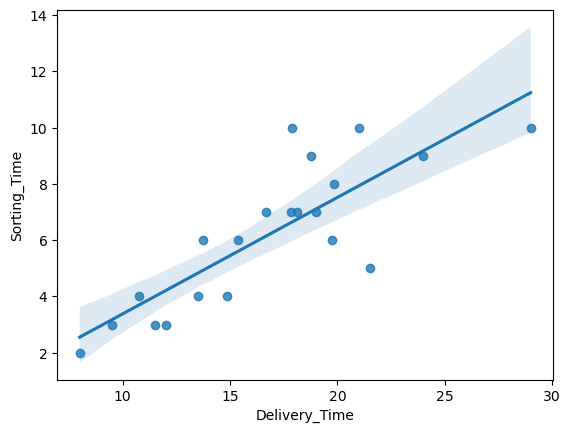

In [21]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data);

In [22]:
#To find B0= 6.58 B1=1.64
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [25]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [26]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [27]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [34]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,8


In [35]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Q2

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

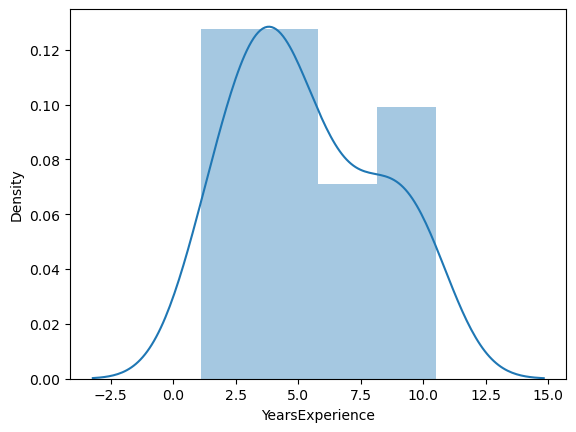

In [46]:
sns.distplot(data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

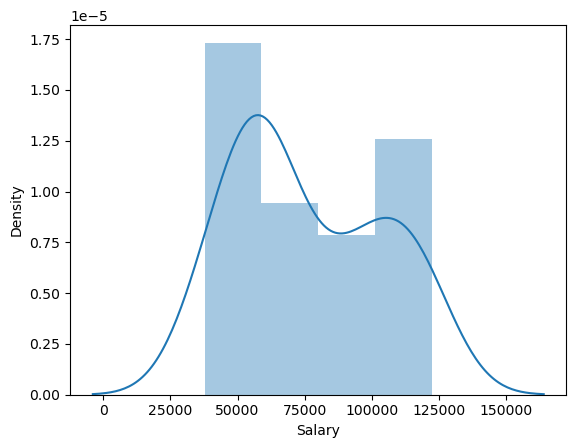

In [47]:
sns.distplot(data['Salary'])

# Correlation Analysis

In [52]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

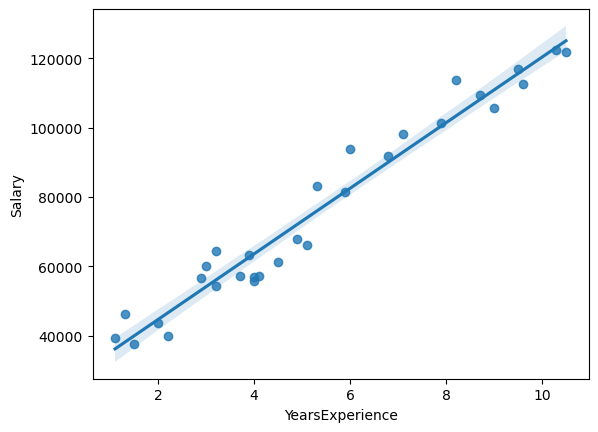

In [53]:
sns.regplot(x=data['YearsExperience'],y=data['Salary']) 

# Model Building 

In [57]:
model=smf.ols("Salary~YearsExperience",data=data).fit() 

# Model Testing

In [58]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [59]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [60]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [64]:
# Manual prediction for say 3 Years Experience
salary = (25792.200199) + (9449.962321) * 3  
salary

54142.087162

In [65]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [66]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [67]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64